In [1]:
# Import necessary libraries
import sys
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from PIL import Image
import seaborn as sns        # For statistical data visualization
import tensorflow as tf      # TensorFlow for deep learning
import random
# Import specific modules from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense# Sequential model for building a linear stack of layers
  # Add any specific modules or layers you intend to use (e.g., Dense, Conv2D, etc.)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
sys.path.append('/Users/jordankanius/LHL_projects/Face2Face_Real_vs_Fake/functions/generator.py')

In [2]:
def create_df(state):
    var =  pd.read_csv(f'./Metadata/{state}.csv')
    return var

In [3]:
train_meta = create_df('train')
valid_meta = create_df('valid')
test_meta = create_df('test')

In [4]:
df_list = [train_meta, valid_meta, test_meta]
for x in df_list:
    print(x['label_str'].value_counts())

label_str
real    50000
fake    50000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64


In [5]:
from functions.visualize import plot_images, sample_images, multi_hist_plot

In [6]:
[0]

[0]

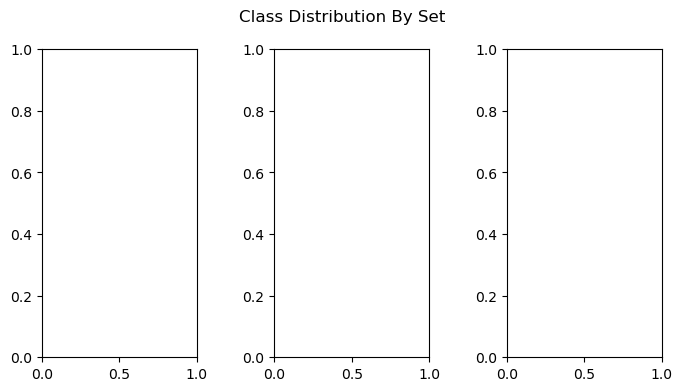

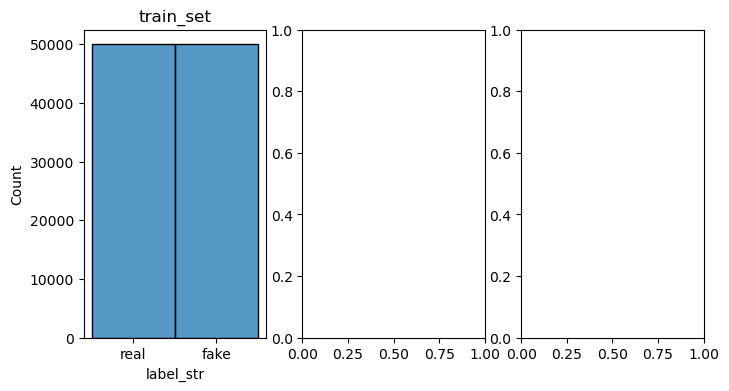

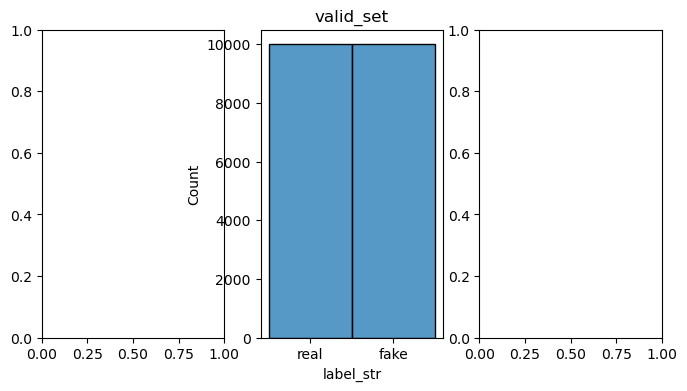

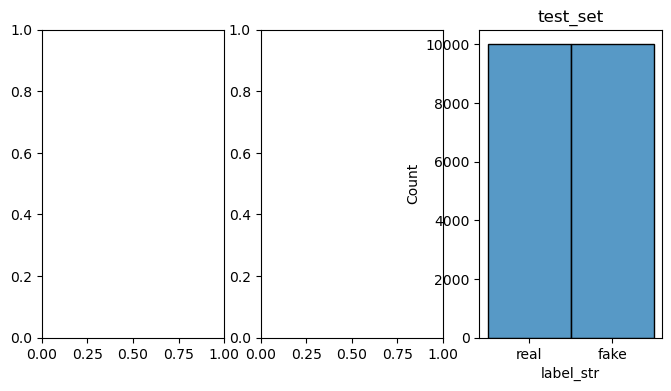

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.subplots_adjust(hspace=0.30, wspace=0.5)
fig.suptitle('Class Distribution By Set')
title_list=['train_set','valid_set','test_set']
axis_list = [(0,0),(0,1),(0,2)]
for x in range(3):
    multi_hist_plot(df_list[x], 'label_str', x, title_list[x])

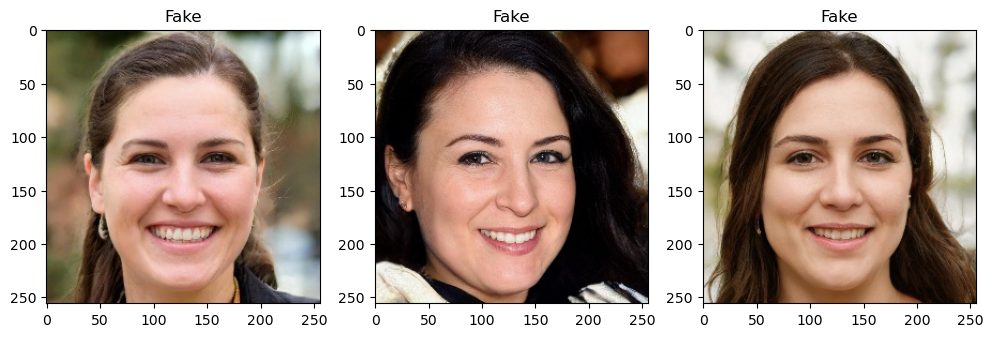

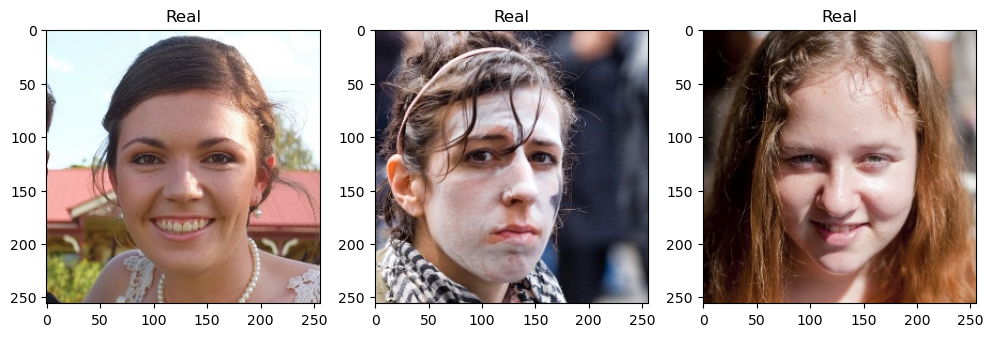

In [8]:
fake_images, real_images = sample_images('train',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

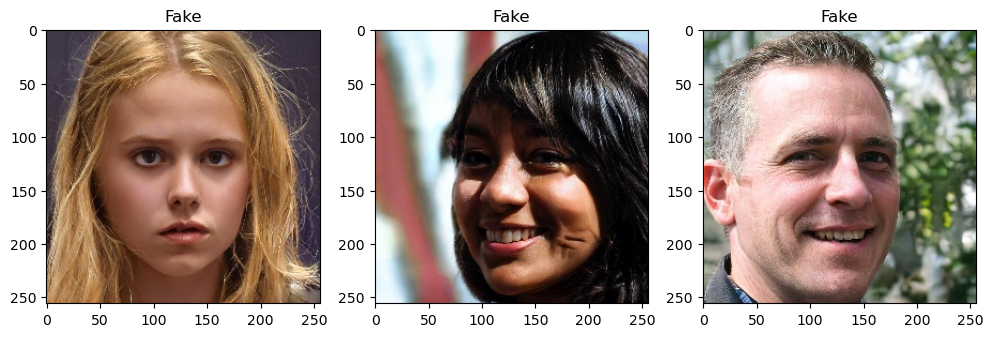

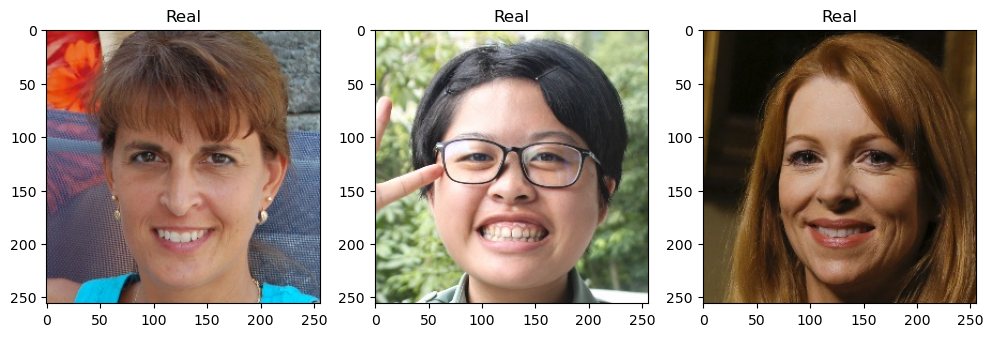

In [9]:
fake_images, real_images = sample_images('test',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

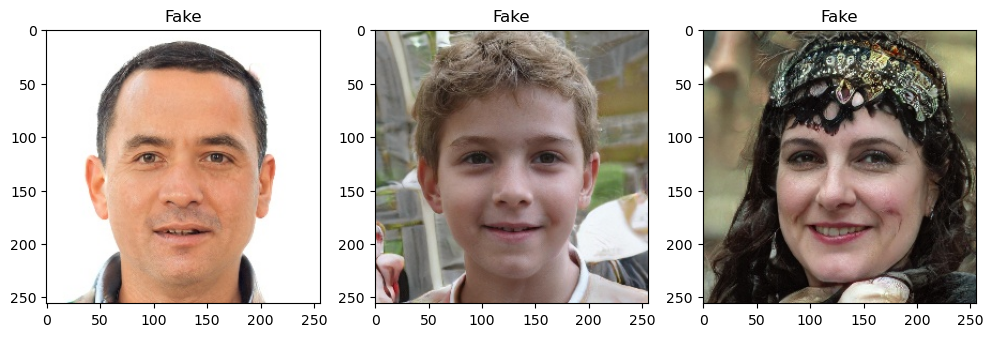

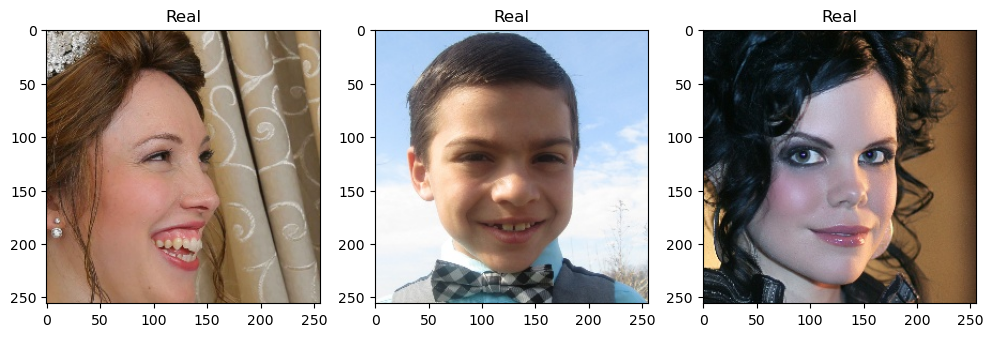

In [10]:
fake_images, real_images = sample_images('valid',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

In [11]:
# Testing image sizes by set
train_path = train_meta['path'].sample(10).to_list()
valid_path = valid_meta['path'].sample(10).to_list()
test_path = test_meta['path'].sample(10).to_list()
for x in range(len(train_path)):
    sample_image = []
    sample_image.append(Image.open(f'./real_vs_fake/real-vs-fake/{train_path[x]}').size)
    print(sample_image)

[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]


In [12]:
for x in range(len(valid_path)):
    sample_image = []
    sample_image.append(Image.open(f'./real_vs_fake/real-vs-fake/{valid_path[x]}').size)
    print(sample_image)

[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]


In [13]:
for x in range(len(test_path)):
    sample_image = []
    sample_image.append(Image.open(f'./real_vs_fake/real-vs-fake/{test_path[x]}').size)
    print(sample_image)

[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]


In [14]:
# testing for rgb or greyscale
train_path = train_meta['path'].sample(1).to_list()[0]
valid_path = valid_meta['path'].sample(1).to_list()[0]
test_path = test_meta['path'].sample(1).to_list()[0]          
train_image = Image.open(f'./real_vs_fake/real-vs-fake/{train_path}')
valid_image = Image.open(f'./real_vs_fake/real-vs-fake/{valid_path}')
test_image = Image.open(f'./real_vs_fake/real-vs-fake/{test_path}')
print(f'train_color = {train_image.getbands()}, valid_color = {valid_image.getbands()}, test_color = {test_image.getbands()}')

train_color = ('R', 'G', 'B'), valid_color = ('R', 'G', 'B'), test_color = ('R', 'G', 'B')


In [15]:
fake_images, real_images = sample_images('train',1)

In [16]:
fake_images, real_images

(['train/fake/7H61IL48OX.jpg'], ['train/real/26314.jpg'])

In [17]:
fake_image = Image.open(f'./real_vs_fake/real-vs-fake/{fake_images[0]}')
real_image = Image.open(f'./real_vs_fake/real-vs-fake/{real_images[0]}')

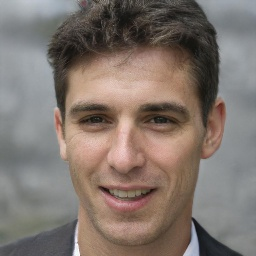

In [18]:
fake_image

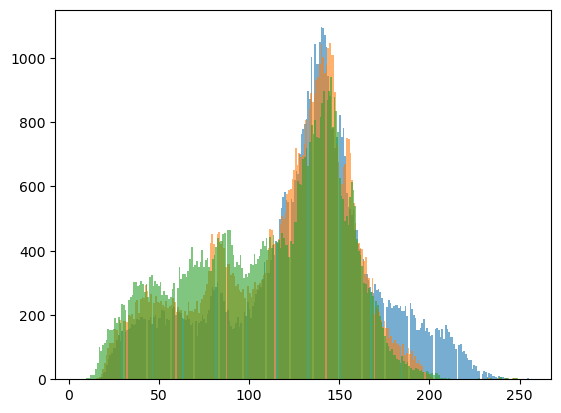

In [19]:
fake_array = np.array(fake_image)
for x in range(3):
    plt.hist(fake_array[:, :, x].ravel(), bins=256, color=f'C{x}', alpha=0.6)
plt.show()

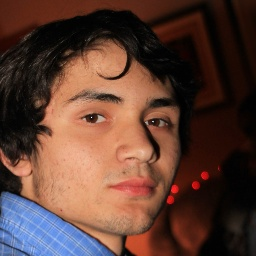

In [20]:
real_image

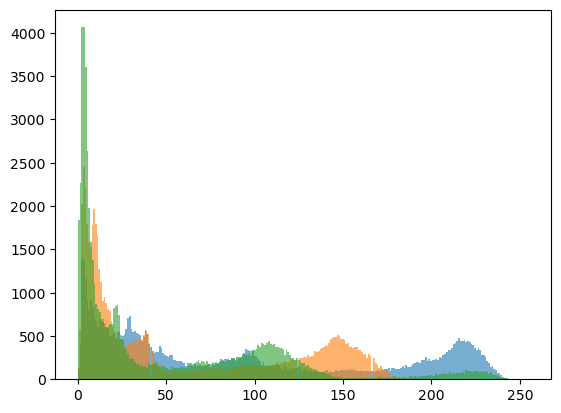

In [21]:
real_array = np.array(Image.open(f'./real_vs_fake/real-vs-fake/{real_images[0]}'))
for x in range(3):
    plt.hist(real_array[:, :, x].ravel(), bins=256, color=f'C{x}', alpha=0.6)
plt.show()

In [22]:
# Specify the base path where your image data is stored
base_path = './real_vs_fake/real-vs-fake/'

# Create an ImageDataGenerator for image preprocessing and augmentation
image_gen = ImageDataGenerator(rescale=1./255.)
# The 'rescale' parameter normalizes pixel values to the range [0, 1] by dividing each pixel value by 255

In [23]:
train_64 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
valid_64 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
test_64 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [24]:
# Create an ImageDataGenerator for the training set
#train_gen = generation('train/')

# Create an ImageDataGenerator for the validation set
#valid_gen = generation('valid/')

# Create an ImageDataGenerator for the test set with shuffling disabled
#test_gen = generation('test/', shuffle=False)

In [25]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (224, 224, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
baseline = classifier.fit(train_64,
                         steps_per_epoch = len(train_64),
                         epochs = 10,
                         validation_data = valid_64)

Epoch 1/10


2023-12-05 10:46:40.438946: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 129s 83ms/step - loss: 0.4717 - accuracy: 0.7754 - val_loss: 0.3410 - val_accuracy: 0.8539
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.2835 - accuracy: 0.8802 - val_loss: 0.2794 - val_accuracy: 0.8819
Epoch 3/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.1853 - accuracy: 0.9260 - val_loss: 0.2253 - val_accuracy: 0.9079
Epoch 4/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.1214 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9190
Epoch 5/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.0760 - accuracy: 0.9716 - val_loss: 0.2275 - val_accuracy: 0.9191
Epoch 6/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.0504 - accuracy: 0.9817 - val_loss: 0.2468 - val_accuracy: 0.9218
Epoch 7/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.0394 - accuracy: 0.9857 - val_loss: 0.2866 - val

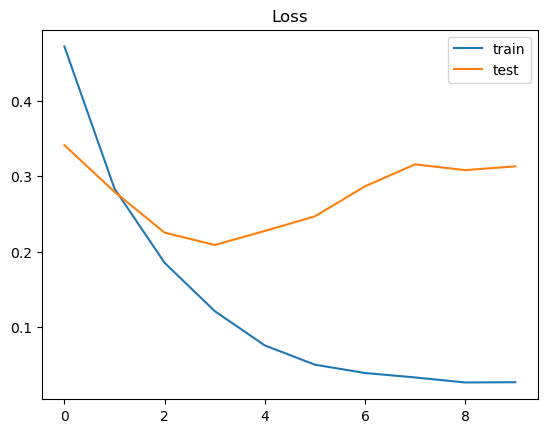

In [27]:
plt.plot(baseline.history['loss'], label='train')
plt.plot(baseline.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

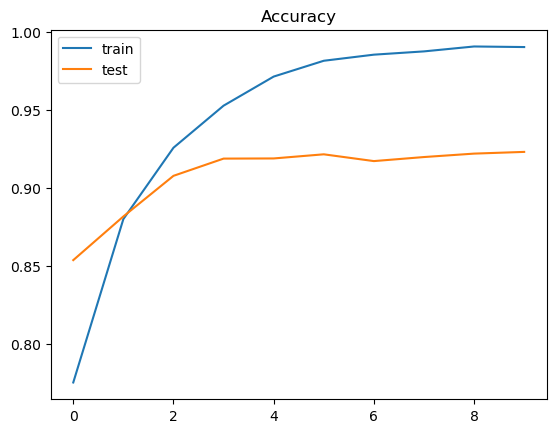

In [28]:
plt.plot(baseline.history['accuracy'], label='train')
plt.plot(baseline.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

In [29]:
y_true_64 = test_64.classes
y_pred_64 = baseline.model.predict(test_64)

313/313 [==============================] - 18s 59ms/step


In [30]:
y_pred_labels_64 = (y_pred_64 < 0.5).astype(int)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
confusion_matrix(y_true_64, y_pred_labels_64)

array([[4928, 5072],
       [5029, 4971]])

In [33]:
baseline64_metric = classification_report(y_true_64, y_pred_labels_64)

In [34]:
print(baseline64_metric)

              precision    recall  f1-score   support

           0       0.49      0.49      0.49     10000
           1       0.49      0.50      0.50     10000

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



In [35]:
train_32 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
valid_32 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
test_32 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [36]:
# Initialising the CNN
classifier_32 = Sequential()

# Step 1 - Convolution
classifier_32.add(Convolution2D(32, 3, 3, input_shape = (224, 224, 3), activation = 'relu'))
# Step 2 - Pooling
classifier_32.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier_32.add(Flatten())
# Step 4 - Full connection
classifier_32.add(Dense(128, activation = 'relu'))
classifier_32.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier_32.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
baseline_32 = classifier_32.fit(train_32,
                         steps_per_epoch = len(train_32),
                         epochs = 10,
                         validation_data = valid_32)

Epoch 1/10
3125/3125 [==============================] - 157s 50ms/step - loss: 0.4788 - accuracy: 0.7669 - val_loss: 0.3756 - val_accuracy: 0.8362
Epoch 2/10
3125/3125 [==============================] - 152s 49ms/step - loss: 0.3030 - accuracy: 0.8703 - val_loss: 0.2914 - val_accuracy: 0.8762
Epoch 3/10
3125/3125 [==============================] - 151s 48ms/step - loss: 0.2230 - accuracy: 0.9086 - val_loss: 0.2610 - val_accuracy: 0.8931
Epoch 4/10
3125/3125 [==============================] - 162s 52ms/step - loss: 0.1723 - accuracy: 0.9312 - val_loss: 0.2587 - val_accuracy: 0.9003
Epoch 5/10
3125/3125 [==============================] - 153s 49ms/step - loss: 0.1342 - accuracy: 0.9477 - val_loss: 0.2968 - val_accuracy: 0.8913
Epoch 6/10
3125/3125 [==============================] - 152s 49ms/step - loss: 0.1060 - accuracy: 0.9585 - val_loss: 0.2739 - val_accuracy: 0.9041
Epoch 7/10
3125/3125 [==============================] - 147s 47ms/step - loss: 0.0867 - accuracy: 0.9668 - val_loss: 0

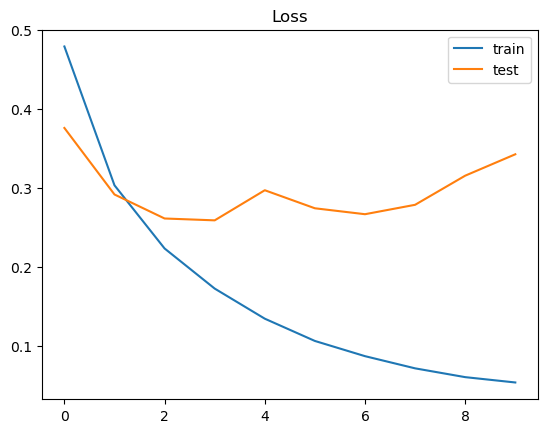

In [38]:
plt.plot(baseline_32.history['loss'], label='train')
plt.plot(baseline_32.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

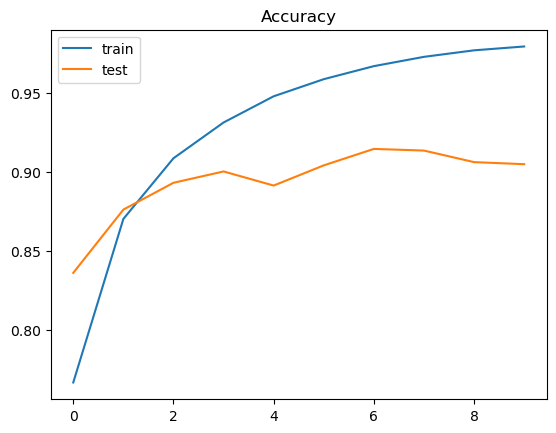

In [39]:
plt.plot(baseline_32.history['accuracy'], label='train')
plt.plot(baseline_32.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

In [40]:
y_true_32 = test_32.classes
y_pred_32 = baseline.model.predict(test_32)

625/625 [==============================] - 19s 30ms/step


In [41]:
y_pred_labels_32 = (y_pred_32 < 0.5).astype(int)

In [42]:
confusion_matrix(y_true_32, y_pred_labels_32)

array([[4943, 5057],
       [5014, 4986]])

In [43]:
baseline32_metric = classification_report(y_true_32, y_pred_labels_32)
print(baseline32_metric)

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     10000
           1       0.50      0.50      0.50     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [44]:
train_128 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
valid_128 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
test_128 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [45]:
# Initialising the CNN
classifier_128 = Sequential()

# Step 1 - Convolution
classifier_128.add(Convolution2D(32, 3, 3, input_shape = (224, 224, 3), activation = 'relu'))
# Step 2 - Pooling
classifier_128.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier_128.add(Flatten())
# Step 4 - Full connection
classifier_128.add(Dense(128, activation = 'relu'))
classifier_128.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier_128.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
baseline_128 = classifier_128.fit(train_128,
                         steps_per_epoch = len(train_128),
                         epochs = 10,
                         validation_data = valid_128)

Epoch 1/10
782/782 [==============================] - 134s 171ms/step - loss: 0.4991 - accuracy: 0.7613 - val_loss: 0.3713 - val_accuracy: 0.8417
Epoch 2/10
782/782 [==============================] - 133s 170ms/step - loss: 0.3187 - accuracy: 0.8644 - val_loss: 0.3038 - val_accuracy: 0.8733
Epoch 3/10
782/782 [==============================] - 133s 170ms/step - loss: 0.2327 - accuracy: 0.9048 - val_loss: 0.2571 - val_accuracy: 0.8945
Epoch 4/10
782/782 [==============================] - 133s 171ms/step - loss: 0.1671 - accuracy: 0.9342 - val_loss: 0.2343 - val_accuracy: 0.9071
Epoch 5/10
782/782 [==============================] - 134s 171ms/step - loss: 0.1231 - accuracy: 0.9525 - val_loss: 0.2390 - val_accuracy: 0.9102
Epoch 6/10
782/782 [==============================] - 133s 170ms/step - loss: 0.0873 - accuracy: 0.9678 - val_loss: 0.2267 - val_accuracy: 0.9169
Epoch 7/10
782/782 [==============================] - 847s 1s/step - loss: 0.0598 - accuracy: 0.9798 - val_loss: 0.3061 - va

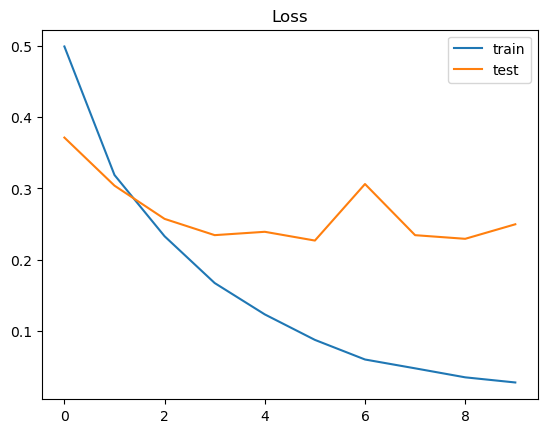

In [47]:
plt.plot(baseline_128.history['loss'], label='train')
plt.plot(baseline_128.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

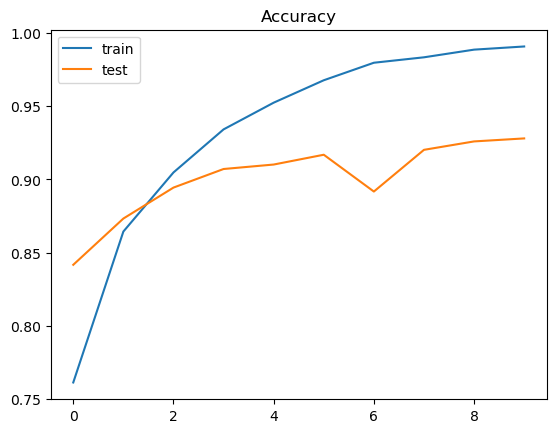

In [48]:
plt.plot(baseline_128.history['accuracy'], label='train')
plt.plot(baseline_128.history['val_accuracy'], label='test')
plt.legend()
plt.title('Accuracy')
plt.show()

In [49]:
y_true_128 = test_128.classes
y_pred_128 = baseline.model.predict(test_128)

157/157 [==============================] - 18s 114ms/step


In [50]:
y_pred_labels_128 = (y_pred_128 < 0.5).astype(int)

In [51]:
confusion_matrix(y_true_128, y_pred_labels_128)

array([[4952, 5048],
       [5005, 4995]])

In [77]:
baseline128_metric = classification_report(y_true_128, y_pred_labels_128)
print(baseline128_metric)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10000
           1       0.50      0.50      0.50     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [119]:
def save_model(model, filename):
    model.model.save(filename)

In [121]:
models = [baseline, baseline_32, baseline_128]
filenames = ['baseline_mdl.h5', 'baseline_32_mdl.h5','baseline_128_mdl.h5']
for x in range(3):
    save_model(models[x], filenames[x])